### 캐글 신용카드 사기 검출 분류 모델
#### 데이터 1차 가공 및 모델 학습 평가

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # warning 메세지 출력을 하지 않도록 설정

# https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook

card_df =pd.read_csv('./creditcard.csv')
card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
from sklearn.model_selection import train_test_split

# 'Time' 컬럼만 삭제
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time',axis = 1, inplace =True) # Time열은 버리기
    print(df_copy.shape)
    print(df_copy.iloc[:,-1].value_counts())
    return df_copy

In [5]:
# train, test 데이터 세트를 분리하여 반환 : [70:30]
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    
    # Stratified 방식으로 추출  (0과 1 비율이  0.998:0.001)
    X_train,X_test,y_train,y_test = \
    train_test_split(X_features,y_target, test_size=0.3,random_state=0, stratify=y_target)
    
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

(284807, 30)
0    284315
1       492
Name: Class, dtype: int64


In [6]:
print('train 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)

print('test 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)
# y_train.shape,y_test.shape

train 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
test 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)   
    roc_auc = roc_auc_score(y_test,pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))
    

In [8]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()  # 0과 1처럼 2진 분류

# 학습(training)
lr_clf.fit(X_train,y_train)

# 예측(prdict)
lr_pred = lr_clf.predict(X_test)

# 평가
get_clf_eval(y_test,lr_pred)  # AUC:0.8107

오차행렬
[[85282    13]
 [   56    92]]
정확도:0.9992, 정밀도: 0.8762, 재현율: 0.6216,    F1:0.7273, AUC:0.8107


In [7]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred )

In [8]:
# ! pip install lightgbm
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬
[[85289     6]
 [   36   112]]
정확도:0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1:0.8421, AUC:0.8783


### 데이터의 분포를 변환하여 학습/예측/평가

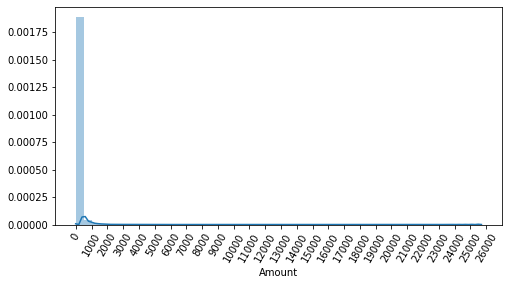

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
192.63         1
218.84         1
195.52         1
793.50         1
1080.06        1
Name: Amount, Length: 32767, dtype: int64

In [9]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000),rotation=60)
sns.distplot(card_df['Amount'])  # 카드 사용금액
plt.show()
card_df['Amount'].value_counts()

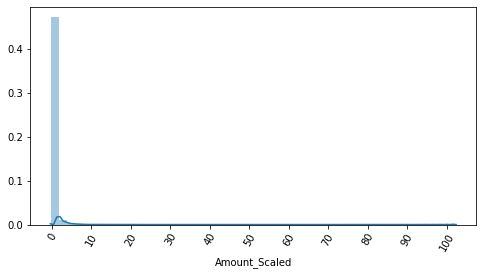

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.350151,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.254117,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,-0.081839,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.313249,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [10]:
# 정규분포 형태로 변환
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    df_copy.insert(0,'Amount_Scaled',amount_n)  # 변환된 결과를 0번 컬럼에  추가
    df_copy.drop(['Time','Amount'], axis=1,inplace=True)
    return df_copy

df_copy = get_preprocessed_df(card_df)
plt.figure(figsize=(8,4))
plt.xticks(range(0,200,10),rotation=60)
sns.distplot(df_copy['Amount_Scaled'])  # 카드 사용금액
plt.show()
df_copy['Amount_Scaled'].value_counts()
df_copy['Amount_Scaled'].max()

df_copy

In [11]:
# 'Amount'를 정규분포 형태로 변환 후 학습및 예측 수행
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

# 결과: 성능 개선이 거의 없다

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   58    90]]
정확도:0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1:0.7143, AUC:0.8040
### LightGBM 예측 성능 ###
오차행렬
[[85289     6]
 [   36   112]]
정확도:0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1:0.8421, AUC:0.8783


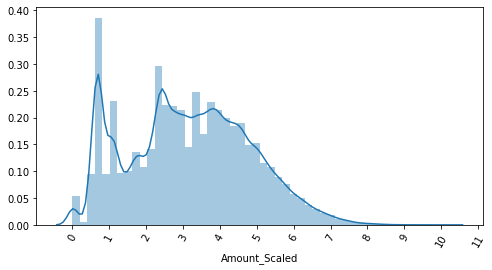

10.153941165977784

In [12]:
## log 변환 후 학습및 예측 수행
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])   # np.log(0) = 무한대, np.log1p(0) ==> np.log(0 + 1)
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'], axis=1,inplace=True)
    return df_copy

df_copy = get_preprocessed_df(card_df)
plt.figure(figsize=(8,4))
plt.xticks(range(0,100,1),rotation=60)
sns.distplot(df_copy['Amount_Scaled'])  # 카드 사용금액
plt.show()
df_copy['Amount_Scaled'].value_counts()
df_copy['Amount_Scaled'].max()

In [13]:
# log 변환 후 학습및 예측 수행
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

# LightGBM 결과: 약간 성능 개선  , AUC:0.8783 --> AUC:0.8817

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85283    12]
 [   59    89]]
정확도:0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1:0.7149, AUC:0.8006
### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   35   113]]
정확도:0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1:0.8496, AUC:0.8817


## 이상치 제거 후  모델 학습및 예측 수행
## IQR(Inter Quantile Range)

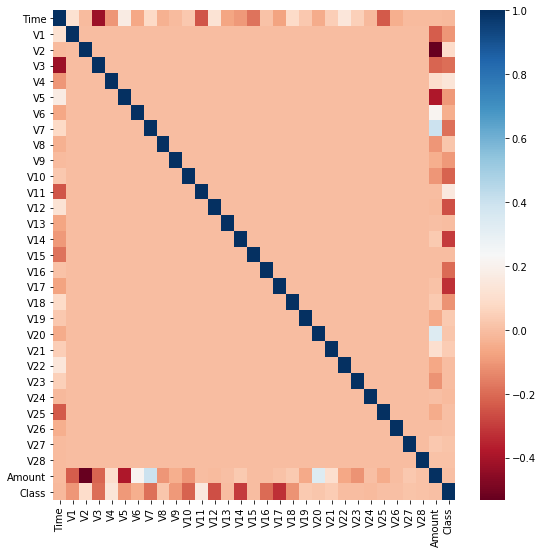

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


In [14]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr,cmap='RdBu')
plt.show()
corr

In [15]:
import numpy as np

def get_outlier(df=None,column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위수와 3/4 분위수를 np.percentile로 구함
    fraud =  df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values,25)   # Q1
    quantile_75 = np.percentile(fraud.values,75)   # Q3
    
    iqr = quantile_75 - quantile_25
    
    lowest_val = quantile_25 - iqr*weight   # 최소값 지점  : Q1 - IQR*1.5
    highest_val = quantile_75 + iqr*weight   # 최대값 지점 : Q3 + IQR*1.5
    print(lowest_val,highest_val)
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

#     normal_data = fraud[(fraud >= lowest_val) & (fraud <= highest_val)] # 극단치가 아닌값만 추출


In [16]:
outlier_index = get_outlier(df=card_df, column='V14',weight=1.5)
print('이상치 인덱스:',outlier_index)
card_df['V14'][outlier_index]

-17.807576138200663 3.8320323237414122
이상치 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


8296   -19.214325
8615   -18.822087
9035   -18.493773
9252   -18.049998
Name: V14, dtype: float64

In [17]:
## log 변환 및 이상치 제거 학습및 예측 수행
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])   # np.log(0) = 무한대, np.log1p(0) ==> np.log(0 + 1)
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'], axis=1,inplace=True)
   
    # 이상치 데이터 행을 모두 삭제하는 코드를 추가
    outlier_index = get_outlier(df=card_df, column='V14',weight=1.5)
    df_copy.drop(outlier_index,axis=0,inplace=True)
    return df_copy

# log 변환 및 이상치 제거후 학습및 예측 수행
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

# LightGBM 결과: 성능 크게 개선  , AUC:0.8817 --> AUC:0.9144

# 'V17' 등 상관계수 값이 큰 컬럼들의 이상치를 제거하여 모델을 구현하면 성능 향상 기대됨(로그변환 포함):숙제

-17.807576138200663 3.8320323237414122
### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   48    98]]
정확도:0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1:0.7597, AUC:0.8355
### LightGBM 예측 성능 ###
오차행렬
[[85291     4]
 [   25   121]]
정확도:0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1:0.8930, AUC:0.9144


#### SMOTE(Synthetic Minority Over-Sampling Technique)오버 샘플링 적용 후 모델 학습/예측/평가
#### : 적은 데이터셋을 증식하여 학습을 위한 충분한 데이터를 확보
#### https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html

In [18]:
# ! pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_sample(X_train,y_train)

print('SMOTE 적용 전 데이터: ',X_train.shape, y_train.shape)
print('SMOTE 적용 후 데이터: ',X_train_over.shape, y_train_over.shape)

print('SMOTE 적용 전 레이블 값 분포:\n ', y_train.value_counts())
print('SMOTE 적용 후 레이블 값 분포:\n ', pd.Series(y_train_over).value_counts())    # 50:50으로 label이 재 설정
# print(type(y_train_over))  # ndarray 는 value_counts() 안됨

SMOTE 적용 전 데이터:  (199362, 29) (199362,)
SMOTE 적용 후 데이터:  (398040, 29) (398040,)
SMOTE 적용 전 레이블 값 분포:
  0    199020
1       342
Name: Class, dtype: int64
SMOTE 적용 후 레이블 값 분포:
  1    199020
0    199020
Name: Class, dtype: int64


In [19]:
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

# LightGBM 결과: 성능 크게 개선
# SMOTE를 적용하면 재현율은 높아지나 정밀도는 낮아짐 (실제 원본 보다 Class=1 인 데이터를  너무 많이 학습한 결과임)
# https://joonable.tistory.com/27

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[82937  2358]
 [   11   135]]
정확도:0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1:0.1023, AUC:0.9485
### LightGBM 예측 성능 ###
오차행렬
[[85286     9]
 [   22   124]]
정확도:0.9996, 정밀도: 0.9323, 재현율: 0.8493,    F1:0.8889, AUC:0.9246


### 비지도 학습: 차원 축소, 군집화
#### 차원 축소 : PCA(Principle component Analysis,주성분 분석)
####   이미지 데이터, 자연언어 텍스트 의미 분석, 과적합(Overfitting)을 방지할수 있다

In [20]:
# PCA 변환
from sklearn.decomposition import PCA

pca = PCA(n_components = 7) # 축소될 차원 설정 : 7차원
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
print('PCA 차원 축소 전:', X_train.shape)
print('PCA 차원 축소 후:', X_train_pca.shape)

pca.fit(X_test)
X_test_pca = pca.transform(X_test)
print('PCA 차원 축소 전:', X_test.shape)
print('PCA 차원 축소 후:', X_test_pca.shape)

PCA 차원 축소 전: (199362, 29)
PCA 차원 축소 후: (199362, 7)
PCA 차원 축소 전: (85441, 29)
PCA 차원 축소 후: (85441, 7)


In [21]:
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train_pca, ftr_test=X_test_pca, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train_pca, ftr_test=X_test_pca, tgt_train=y_train, tgt_test=y_test)

# LightGBM 결과:  개선 없음

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85286     9]
 [  132    14]]
정확도:0.9983, 정밀도: 0.6087, 재현율: 0.0959,    F1:0.1657, AUC:0.5479
### LightGBM 예측 성능 ###
오차행렬
[[85102   193]
 [  145     1]]
정확도:0.9960, 정밀도: 0.0052, 재현율: 0.0068,    F1:0.0059, AUC:0.5023


In [22]:
# PCA 변환 , SMOTE 오버샘플링 데이터 사용
from sklearn.decomposition import PCA

pca = PCA(n_components = 7) # 축소될 차원 설정 : 7차원
pca.fit(X_train_over)
X_train_pca = pca.transform(X_train_over)
print('PCA 차원 축소 전:', X_train_over.shape)
print('PCA 차원 축소 후:', X_train_pca.shape)

pca.fit(X_test)
X_test_pca = pca.transform(X_test)
print('PCA 차원 축소 전:', X_test.shape)
print('PCA 차원 축소 후:', X_test_pca.shape)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train_pca, ftr_test=X_test_pca, tgt_train=y_train_over, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train_pca, ftr_test=X_test_pca, tgt_train=y_train_over, tgt_test=y_test)

# LightGBM 결과:  개선 없음

PCA 차원 축소 전: (398040, 29)
PCA 차원 축소 후: (398040, 7)
PCA 차원 축소 전: (85441, 29)
PCA 차원 축소 후: (85441, 7)
### 로지스틱 회귀 예측 성능 ###
오차행렬
[[  258 85037]
 [   73    73]]
정확도:0.0039, 정밀도: 0.0009, 재현율: 0.5000,    F1:0.0017, AUC:0.2515
### LightGBM 예측 성능 ###
오차행렬
[[16245 69050]
 [  115    31]]
정확도:0.1905, 정밀도: 0.0004, 재현율: 0.2123,    F1:0.0009, AUC:0.2014
